<h1>Luokiteltu jakauma</h1>

Määrällisen muuttujan jakaumaan tutustun luokitellun jakauman avulla. Nopein tapa on <b>hist</b>-kaaviolajin käyttö.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Tyyli vaikuttaa grafiikan ulkoasuun
# Käytettävissä olevat tyylit voit listata komennolla plt.style.available
plt.style.use('seaborn-whitegrid')

In [2]:
# Datan avaaminen
df = pd.read_excel('http://taanila.fi/data1.xlsx')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [3]:
# Määrittelen luokkarajat palkan luokittelemiseksi 
# Vaihtoehtoisesti voin antaa luokkien lukumäärän
bins = [1000, 2000, 3000, 4000, 7000]

# Lisään dataan palkkaluokka-sarakkeen
df['Palkkaluokka'] = pd.cut(df['palkka'], bins = bins)

# Palkkaluokkiin kuuluvien lukumäärät
df1 = pd.crosstab(df['Palkkaluokka'], 'lkm')

# Häiritsevän otsikon poistaminen
df1.columns.name = ''

# Prosentit
n = df1['lkm'].sum()
df1['%'] = df1/n*100

# Yhteensä-rivin lisäämiseksi indeksin luokkaväliarvot on ensin muuutettava merkkijonoiksi,
# koska dataframen sarake saa sisältää vain yhden tyyppistä tietoa!
df1.index = df1.index.astype(str)
df1.loc['Yhteensä'] = df1.sum()

# Prosenttilukujen ulkoasun viimeistely
df1.style.format({'lkm': '{:.0f}', '%': '{:.1f} %'})

,lkm,%
Palkkaluokka,,
"(1000, 2000]",19,23.2 %
"(2000, 3000]",50,61.0 %
"(3000, 4000]",8,9.8 %
"(4000, 7000]",5,6.1 %
Yhteensä,82,100.0 %


<h2>Histogrammi</h2>

Histogrammi on nopein keino luokitellun jakauman tarkateluun (tätä varten ei tarvitse erikseen laskea luokiteltua jakaumaa).

Text(0, 0.5, 'Lukumäärä')

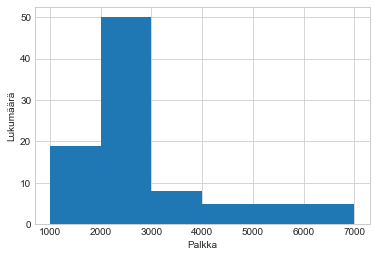

In [4]:
# Käytän edellä määriteltyjä luokkarajoja (bins)
ax1 = df['palkka'].hist(bins=bins)

ax1.set_xlabel('Palkka')
ax1.set_ylabel('Lukumäärä')

[Text(0, 0, '0 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '30 %'),
 Text(0, 0, '40 %'),
 Text(0, 0, '50 %'),
 Text(0, 0, '60 %'),
 Text(0, 0, '70 %')]

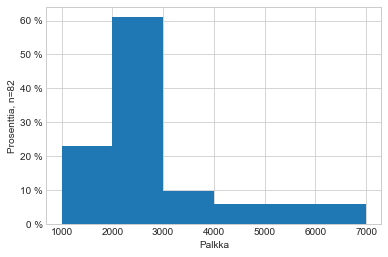

In [5]:
# np.ones kikalla prosentit hist-kaavioon
# n (kokonaislukumäärä) on laskettu edellä
# np.ones kikka tuottaa painokertoimiksi 1/n

# Histogrammi, jossa y-akselilla prosentit
ax2 = df['palkka'].hist(bins=bins, weights=np.ones(n)/n)
ax2.set_xlabel('Palkka')
ax2.set_ylabel('Prosenttia, n='+str(n))

# y-akselin prosenttilukujen ulkoasun viimeistely
ax2.set_yticklabels(['{:.0f} %'.format(y*100) for y in ax2.get_yticks()])